Sampling Frequency: 16000 Hz


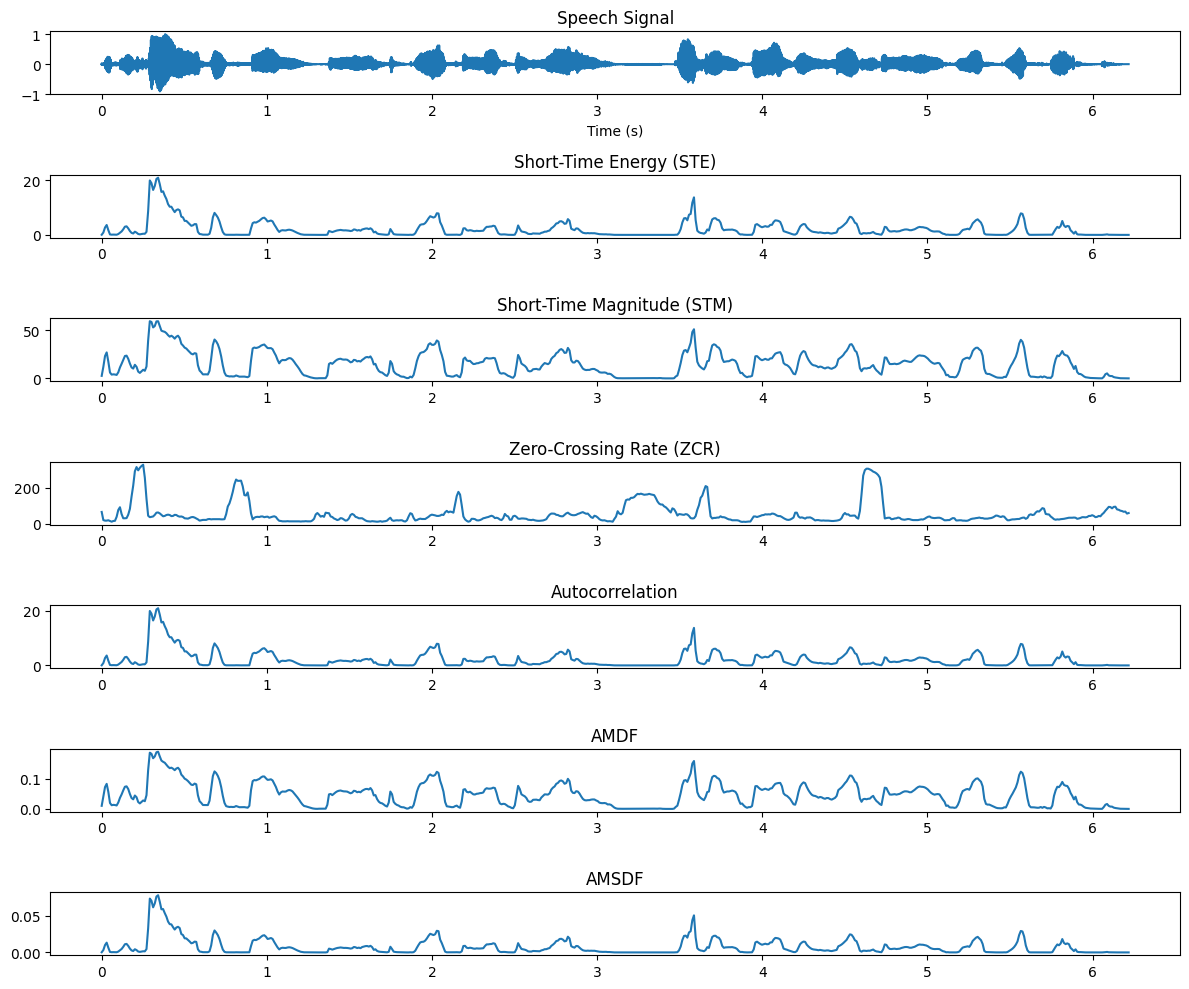

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from numpy import hamming
from scipy.signal import lfilter
from scipy.fftpack import fft
import librosa

# Function to compute short-time energy (STE)
def compute_ste(frames):
    return np.sum(frames ** 2, axis=1)

# Function to compute short-time magnitude (STM)
def compute_stm(frames):
    return np.sum(np.abs(frames), axis=1)

# Function to compute zero-crossing rate (ZCR)
def compute_zcr(frames):
    return np.sum(np.abs(np.diff(np.sign(frames))), axis=1) / 2

# Function to compute autocorrelation
def compute_autocorrelation(frames):
    return np.array([np.correlate(frame, frame, mode='full')[len(frame) - 1] for frame in frames])

# Function to compute AMDF
def compute_amdf(frames):
    amdf_vals = []
    for frame in frames:
        amdf_frame = np.array([np.mean(np.abs(frame[:len(frame)-k] - frame[k:])) for k in range(1, len(frame))])
        amdf_vals.append(np.mean(amdf_frame))
    return np.array(amdf_vals)

# Function to compute AMSDF (Average Squared Difference Function)
def compute_amsdf(frames):
    amsdf_vals = []
    for frame in frames:
        amsdf_frame = np.array([np.mean((frame[:len(frame)-k] - frame[k:])**2) for k in range(1, len(frame))])
        amsdf_vals.append(np.mean(amsdf_frame))
    return np.array(amsdf_vals)

# Load speech sample
file_path = '/content/LJ001-0140.wav'  # Update with actual .wav file path
audio,sampling_rate = librosa.load(file_path, sr=16000)

# Print the sampling frequency
print(f"Sampling Frequency: {sampling_rate} Hz")

# Normalize signal
signal = audio / np.max(np.abs(audio))

# Frame size and step size
frame_size = int(0.025 * sampling_rate)  # 25ms frames
step_size = int(0.01 * sampling_rate)    # 10ms step
window = np.hamming(frame_size)

# Framing the signal
frames = np.array([signal[i:i+frame_size] * window for i in range(0, len(signal)-frame_size, step_size)])

# Compute features
ste = compute_ste(frames)
stm = compute_stm(frames)
zcr = compute_zcr(frames)
autocorr = compute_autocorrelation(frames)
amdf = compute_amdf(frames)
amsdf = compute_amsdf(frames)

# Time axis
time_axis = np.linspace(0, len(signal) / sampling_rate, num=len(ste))

# Plot results
plt.figure(figsize=(12, 10))

plt.subplot(7, 1, 1)
plt.plot(np.linspace(0, len(signal) / sampling_rate, num=len(signal)), signal)
plt.title("Speech Signal")
plt.xlabel("Time (s)")

plt.subplot(7, 1, 2)
plt.plot(time_axis, ste)
plt.title("Short-Time Energy (STE)")

plt.subplot(7, 1, 3)
plt.plot(time_axis, stm)
plt.title("Short-Time Magnitude (STM)")

plt.subplot(7, 1, 4)
plt.plot(time_axis, zcr)
plt.title("Zero-Crossing Rate (ZCR)")

plt.subplot(7, 1, 5)
plt.plot(time_axis, autocorr)
plt.title("Autocorrelation")

plt.subplot(7, 1, 6)
plt.plot(time_axis, amdf)
plt.title("AMDF")

plt.subplot(7, 1, 7)
plt.plot(time_axis, amsdf)
plt.title("AMSDF")

plt.tight_layout()
plt.show()
